In [1]:
import numpy as np
from classy import Class

lcdm = Class()
lcdm.set({
    'output': 'mPk',
    'non linear': 'none',
    'P_k_max_1/Mpc' : 150,
})
lcdm.compute()
ks = np.logspace(-3, 2, 1000)


fs = [0.1, 0.5, 1.0]
pks_f = []
for i, f in enumerate(fs):
    Gf = 0.005
    Gamma = Gf/f
    ddm = Class()
    Omega_dm = lcdm.Omega_m() - lcdm.Omega_b()
    ddm.set(({
        'output': 'mPk',
        'non linear': 'none',
        'P_k_max_1/Mpc' : ks[-1],
        'Omega_ini_dcdm' : Omega_dm * f,
        'Omega_cdm' : Omega_dm * (1-f),
        'Gamma_dcdm' : 977.792 * Gamma
    }))
    ddm.compute()
    pks_f.append(np.vectorize(ddm.pk_lin)(ks * lcdm.h(), 0) / np.vectorize(lcdm.pk_lin)(ks * lcdm.h(), 0))

Gfs = [0.001, 0.005, 0.01]
pks_gf = []
for i, Gf in enumerate(Gfs):
    f = 0.5
    Gamma = Gf/f
    ddm = Class()
    Omega_dm = lcdm.Omega_m() - lcdm.Omega_b()
    ddm.set(({
        'output': 'mPk',
        'non linear': 'none',
        'P_k_max_1/Mpc' : ks[-1],
        'Omega_ini_dcdm' : Omega_dm * f,
        'Omega_cdm' : Omega_dm * (1-f),
        'Gamma_dcdm' : 977.792 * Gamma
    }))
    ddm.compute()
    pks_gf.append(np.vectorize(ddm.pk_lin)(ks * lcdm.h(), 0) / np.vectorize(lcdm.pk_lin)(ks * lcdm.h(), 0))

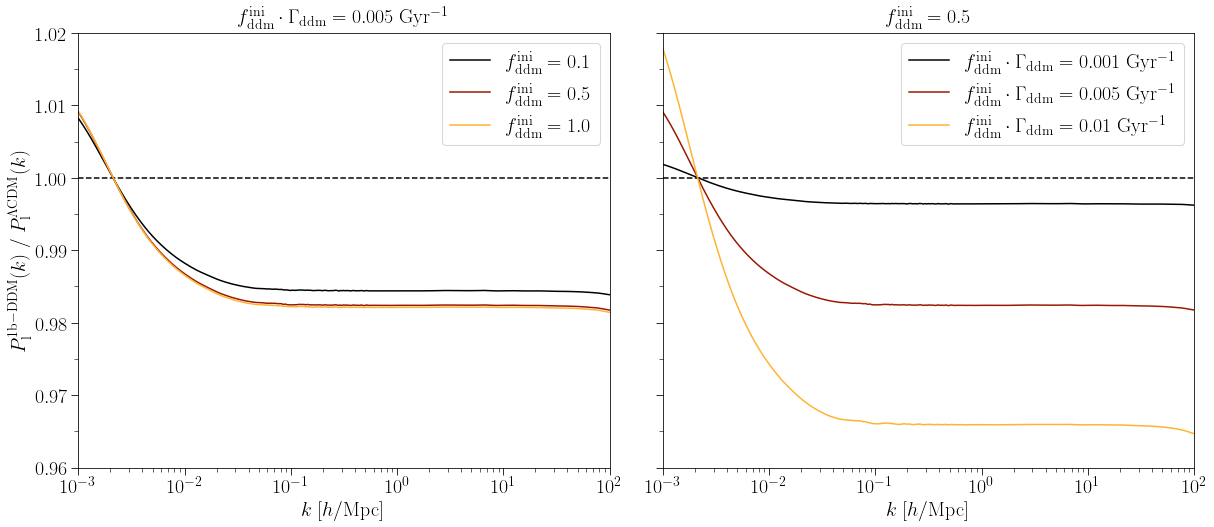

In [4]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pl

mpl.rcParams['text.usetex'] = True


fontsize = 20
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(8)
fig.set_figwidth (20)


ax1.set_title(r"$f_\mathrm{ddm}^\mathrm{ini}\cdot\Gamma_\mathrm{ddm} = 0.005\mathrm{\;Gyr^{-1}}$", fontsize=fontsize, pad=10)
ax1.set_ylabel(r"$P_\mathrm{l}^\mathrm{1b-DDM}(k)\;/\;P_\mathrm{l}^{\Lambda\mathrm{CDM}}(k)$", fontsize=fontsize)
ax1.set_xlabel(r"$k\; [h\mathrm{/Mpc}]$", fontsize=fontsize)
ax1.set_xlim(ks[0], ks[-1])
ax1.set_ylim(0.96,1.02)
ax1.set_xscale("log")

ax2.set_title(r"$f_\mathrm{ddm}^\mathrm{ini}=0.5$", fontsize=fontsize, pad=10)
ax2.set_xlabel(r"$k\; [h\mathrm{/Mpc}]$", fontsize=fontsize)
ax2.set_xlim(ks[0], ks[-1])
ax2.set_ylim(0.96,1.02)
ax2.set_xscale("log")

ax1.hlines(1, ks[0], ks[-1], linestyles="dashed", color="black")
ax2.hlines(1, ks[0], ks[-1], linestyles="dashed", color="black")

colours = pl.cm.afmhot(np.linspace(0,0.6,len(fs)))
for i, pk in enumerate(pks_f):
    ax1.plot(
        ks,
        pk,
        label="$f_\mathrm{ddm}^\mathrm{ini} = %s$" % fs[i],
        color=colours[i]
    )

colours = pl.cm.afmhot(np.linspace(0,0.6,len(Gfs)))
for i, pk in enumerate(pks_gf):
    ax2.plot(
        ks,
        pks_gf[i],
        label="$f_\mathrm{ddm}^\mathrm{ini}\cdot\Gamma_\mathrm{ddm} = %s\mathrm{\;Gyr^{-1}}$" % Gfs[i],
        color=colours[i]
    )

ax1.legend(fontsize=fontsize)
ax2.legend(fontsize=fontsize)
ticks = [0.96, 0.97, 0.98, 0.99, 1.00, 1.01, 1.02]
ticks_labels = ["$0.96$", "$0.97$", "$0.98$", "$0.99$", "$1.00$", "$1.01$", "$1.02$"]
ticks_minor = [0.965, 0.975, 0.985, 0.995, 1.005, 1.015]
empty = ["", "", "", "", "", "", ""]
empty_minor = ["", "", "", "", "", ""]
ax1.set_yticks(ticks, ticks_labels, fontsize=fontsize)
ax1.set_yticks(ticks_minor, empty_minor, minor=True)
ax2.set_yticks(ticks, empty, fontsize=fontsize)
ax2.set_yticks(ticks_minor, empty_minor, minor=True)
ax1.tick_params(length=7, labelsize=fontsize)
ax1.tick_params(length=4, labelsize=fontsize, which="minor")
ax2.tick_params(length=7, labelsize=fontsize)
ax2.tick_params(length=4, labelsize=fontsize, which="minor")

plt.subplots_adjust(wspace=0.1)

fig.savefig("/home/justus/Uni/plots/pk_lin/1b.pdf", bbox_inches = "tight")